## **Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**dataset reading**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project01/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
df.shape

(9578, 14)

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#Checking for Duplicates
df.duplicated().sum()

0

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**credit risk of the borrowers with loan default **.

In [ ]:
c=df['credit.policy'].value_counts()
c

1    7710
0    1868
Name: credit.policy, dtype: int64

# **loan approval analysis**

In [ ]:
df['log.annual.inc'].nunique()


1987

In [ ]:
df['log.annual.inc'].mean()

10.93211713780027

In [ ]:

d=df[df['log.annual.inc']>=10.932][['purpose','log.annual.inc','int.rate','fico','credit.policy','inq.last.6mths']]
d

,purpose,log.annual.inc,int.rate,fico,credit.policy,inq.last.6mths
0,debt_consolidation,11.350407,0.1189,737,1,0
1,credit_card,11.082143,0.1071,707,1,0
3,debt_consolidation,11.350407,0.1008,712,1,1
4,credit_card,11.299732,0.1426,667,1,0
5,credit_card,11.904968,0.0788,727,1,0
...,...,...,...,...,...,...
9569,home_improvement,12.429216,0.1426,722,0,5
9571,all_other,11.225243,0.1568,677,0,4
9573,all_other,12.180755,0.1461,672,0,2
9574,all_other,11.141862,0.1253,722,0,5


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


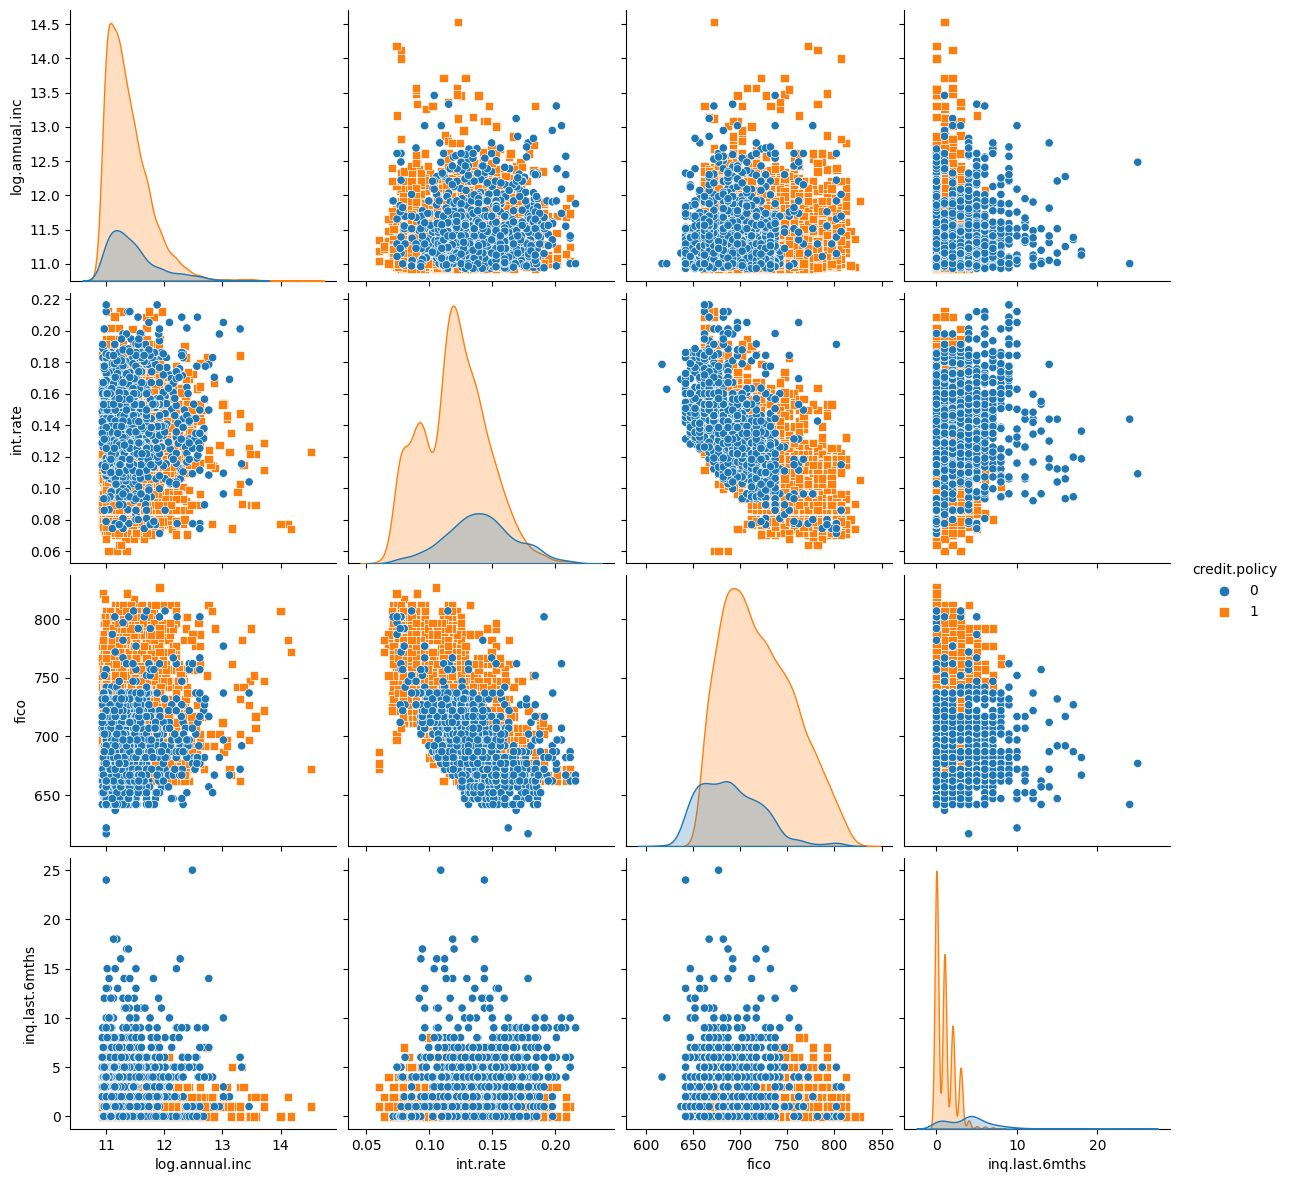

In [ ]:
sns.pairplot(data=d,hue='credit.policy',size=3,markers=['o','s'])

In [ ]:
df['inq.last.6mths'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 33,  9, 18, 14, 15, 13, 12, 10,
       19, 11, 16, 20, 27, 25, 28, 31, 24, 17, 32])

# **Inquiry Analysis**:

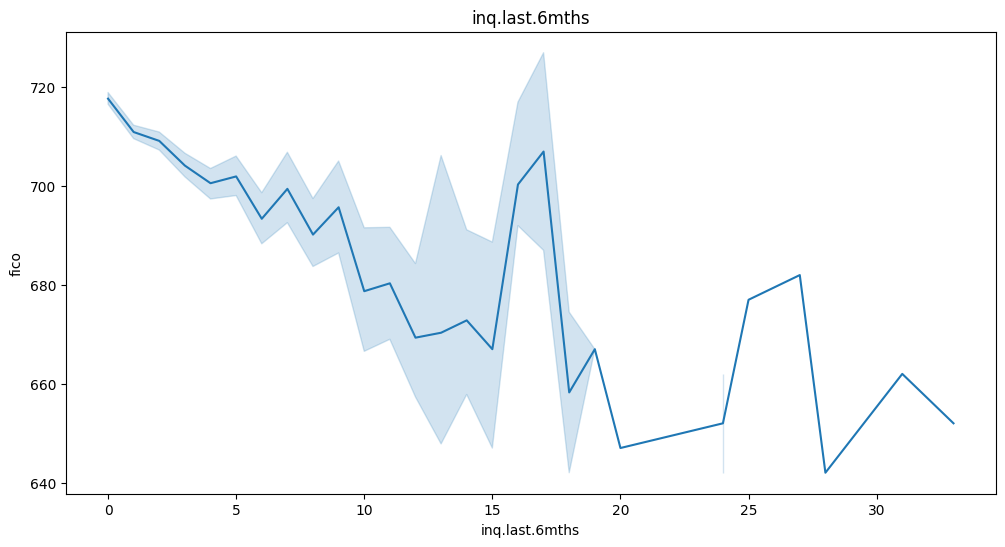

In [ ]:
plt.figure(figsize=(12,6))
plt.title('inq.last.6mths')
sns.lineplot(x='inq.last.6mths',y='fico',data=df)
plt.show()



*   fico score was maximum when the inq last is between 15to 20.




In [ ]:
#finding which purpose is having the maximum no of inquires from last 6months

df.groupby('purpose')[['inq.last.6mths','purpose']].agg({'inq.last.6mths':'mean'})

,inq.last.6mths
purpose,
all_other,1.646504
credit_card,1.387480
debt_consolidation,1.461461
educational,1.854227
home_improvement,1.941176
major_purchase,1.562929
small_business,1.933764


'home_improvement' and  'small_business' had got the high mean of inquiries by the creditors.

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# **Interest Rate Analysis**
 Study how different factors influence the interest rate assigned to borrowers.


Text(0.5, 1.0, 'relationship between fico and int.rate')

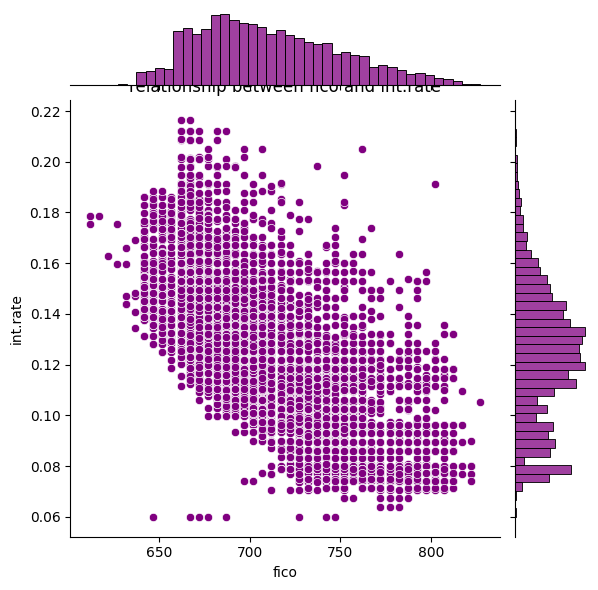

In [ ]:
#finding the factors effecting the interest rate of the loan
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')
plt.title('relationship between fico and int.rate')



*   maximum interst rate is lieing between 0.13
*   fico score is ranging between 670.



In [ ]:
#checking the nunique values in columns
df['int.rate'].nunique()


249

In [ ]:
df['dti'].nunique()


2529

<Axes: xlabel='log.annual.inc', ylabel='dti'>

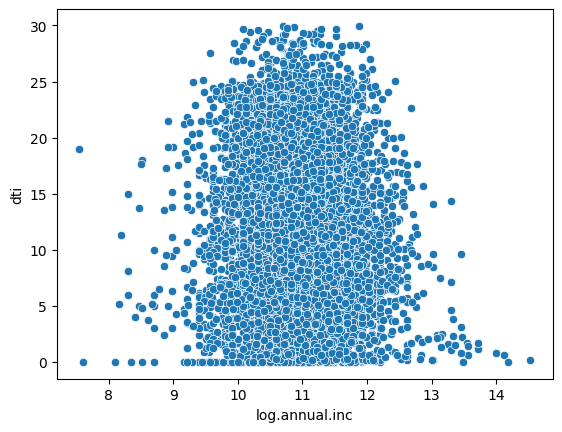

In [ ]:
#relation between 'log.annual.inc' and  'dti'
sns.scatterplot(x='log.annual.inc',y='dti',palette='viridis',data=df)

dti and log.annual.inc are linearly correlated when income is between log of 10 to 12

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

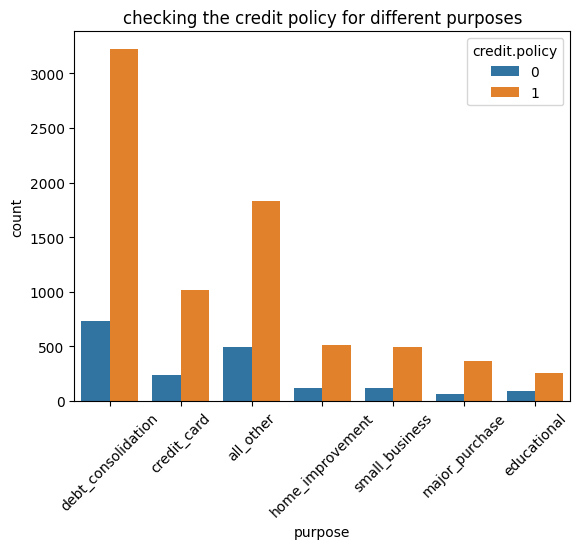

In [ ]:
#checking the count of pupose in creditpolicy
sns.countplot(x='purpose',hue='credit.policy',data=df)
plt.title('checking the credit policy for different purposes')
plt.xticks(rotation=45)

'debt_consolidation' purpose is  meeting the maximum criteria of paying loan.

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
#checking the unique values
df['fico'].unique()


array([737, 707, 682, 712, 667, 727, 722, 677, 662, 767, 747, 702, 672,
       797, 772, 782, 802, 812, 742, 692, 777, 762, 757, 787, 717, 752,
       792, 627, 687, 697, 732, 822, 632, 807, 817, 827, 642, 647, 652,
       657, 637, 612, 617, 622])

In [ ]:
df['days.with.cr.line'].nunique() #2687


2687

In [ ]:

df['not.fully.paid'].unique()

array([0, 1])

In [ ]:
df['not.fully.paid'].replace({1:'yes',0:'no'},inplace=True)

In [ ]:
df['not.fully.paid'].value_counts()

no     8045
yes    1533
Name: not.fully.paid, dtype: int64

<Axes: xlabel='not.fully.paid', ylabel='fico'>

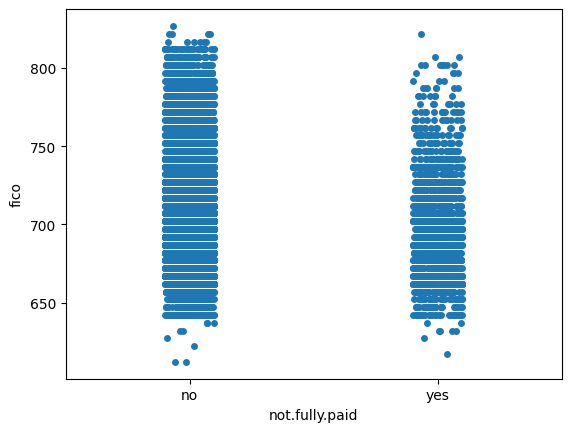

In [ ]:
sns.stripplot(y='fico',x='not.fully.paid',data=df)

from the above observation we can understand that fico_score tells us that percentage of notfully.paid the loan is no.

In [ ]:
df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
#finding the min values for purpose intrate nd installment by using installment
df[['purpose','int.rate','installment']].sort_values(by='installment').min()

purpose        all_other
int.rate            0.06
installment        15.67
dtype: object

In [ ]:
df[['purpose','int.rate','installment']].sort_values(by='int.rate').max()

purpose        small_business
int.rate               0.2164
installment            940.14
dtype: object

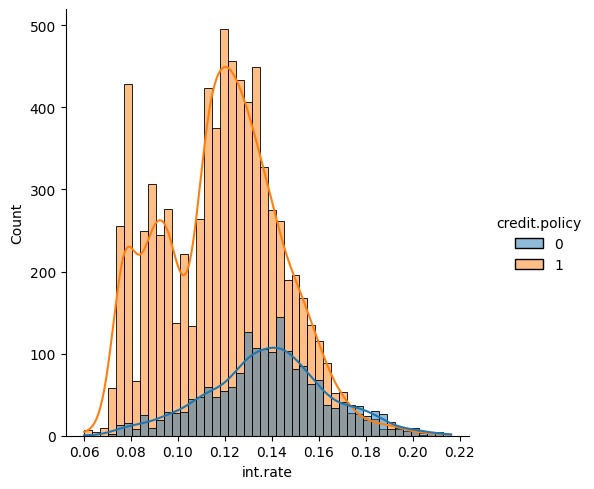

In [ ]:
sns.displot(x='int.rate',hue='credit.policy',kde=True,data=df)

In [ ]:
#finding the highest fico score with respect to policy
df[['int.rate','fico','credit.policy']].sort_values(by='credit.policy').max()

int.rate           0.2164
fico             827.0000
credit.policy      1.0000
dtype: float64

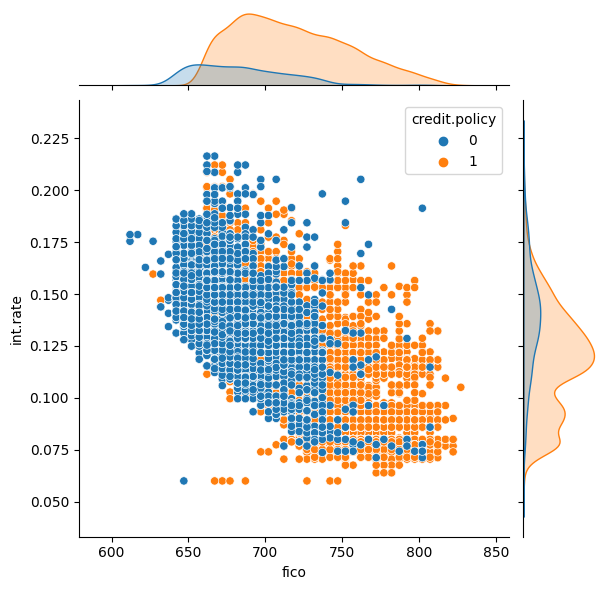

In [ ]:
sns.jointplot(x='fico',y='int.rate',hue='credit.policy',data=df)

# . **Delinquency Analysis**:

In [ ]:
df['delinq.2yrs'].unique()

array([ 0,  1,  2,  4,  3,  5,  6, 13,  7,  8, 11])

<Axes: xlabel='delinq.2yrs', ylabel='count'>

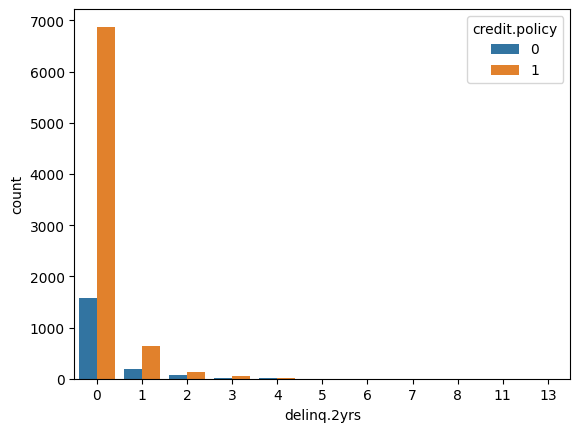

In [ ]:
sns.countplot(x='delinq.2yrs',hue='credit.policy',data=df)

delinq.2yrs maximum at 0 count of  high so, this factor will not effect loan outcome(credit policy).

In [ ]:
df1=pd.get_dummies(df,columns=['purpose','not.fully.paid'])


In [ ]:
df1.sample()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid_no,not.fully.paid_yes
5676,1,0.074,155.3,10.819778,17.93,772,9420.0,16685,47.5,0,...,0,0,0,1,0,0,0,0,1,0


<Axes: xlabel='credit.policy', ylabel='int.rate'>

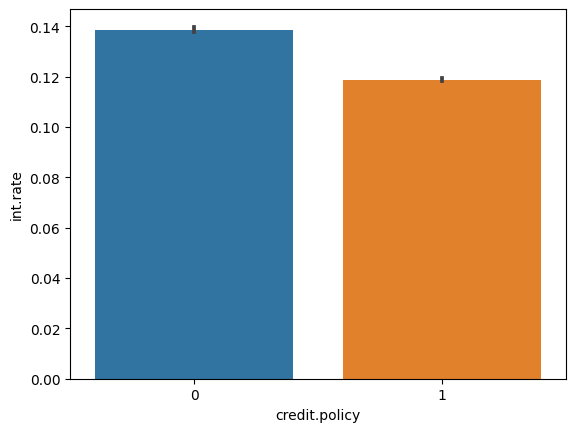

In [ ]:
sns.barplot(x='credit.policy',y='int.rate',data=df)

from the above we have observed that 0(no) percentage was high with respect to the interest.rate.

<Axes: xlabel='int.rate'>

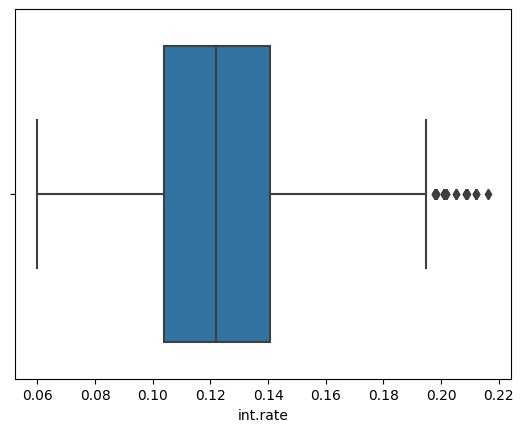

In [ ]:
sns.boxplot(x='int.rate',data=df)

interest is between the 0.10 to 0.14.

In [ ]:
df[['fico', 'purpose']].sort_values(by='fico').max()

fico                  827
purpose    small_business
dtype: object

In [ ]:
df['fico'].mean()

710.8463144706619

In [ ]:
d3=df[(df['credit.policy']==1) & (df['purpose']=='small_business')  &(df['not.fully.paid']==1)][['int.rate', 'installment','not.fully.paid','purpose','fico','credit.policy']]
d3

,int.rate,installment,not.fully.paid,purpose,fico,credit.policy
73,0.1501,225.37,1,small_business,677,1
89,0.0964,642.02,1,small_business,737,1
90,0.1154,104.76,1,small_business,672,1
102,0.1501,73.68,1,small_business,702,1
130,0.1217,166.48,1,small_business,662,1
...,...,...,...,...,...,...
7377,0.1273,134.27,1,small_business,722,1
7573,0.1136,493.67,1,small_business,712,1
7681,0.1311,269.96,1,small_business,742,1
7695,0.1565,699.73,1,small_business,722,1


<Axes: xlabel='installment'>

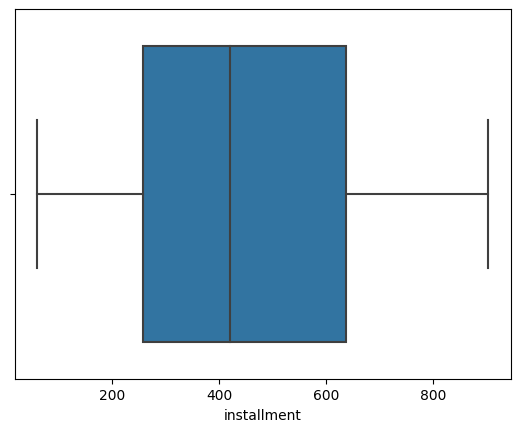

In [ ]:
sns.boxplot(x='installment',data=d3)

for the small business purpose the installment is positively skewed.

In [ ]:
d3.shape

(59, 6)

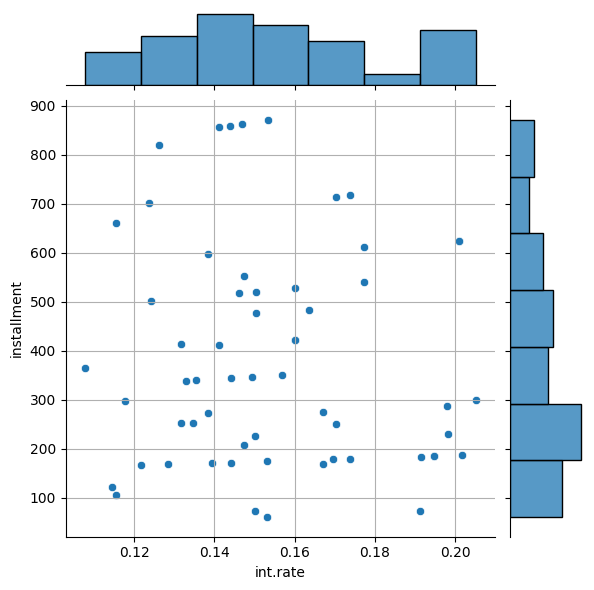

In [ ]:
sns.jointplot(x='int.rate',y= 'installment',data=d3)
plt.title('relation between int.rate and installment')
plt.grid()

# **Training and testing:**

In [ ]:
df.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

**splitting data:**

In [ ]:
x=df1.drop(['credit.policy'],axis=1)
y=df1[['credit.policy']]

In [ ]:
x.shape

(9578, 20)

In [ ]:
y.shape

(9578, 1)

In [ ]:
xtrain.shape

(7183, 20)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=30)

# **scaling:**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# **model training:**

**logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc1=accuracy_score(ytest,pred)*100
acc1


91.10647181628393

decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dr=DecisionTreeClassifier(max_depth=5,criterion='gini',max_features=5,max_leaf_nodes=5)
dr.fit(xtrain,ytrain)


DecisionTreeClassifier(max_depth=5, max_features=5, max_leaf_nodes=5)

In [ ]:
pred3=dr.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc2=accuracy_score(ytest,pred3)*100
acc2

86.43006263048017

**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5)
rfc.fit(xtrain,ytrain)
pred1=rfc.predict(xtest)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming xtrain is a NumPy array
# You can convert it to a DataFrame before creating the Series
xtrain_df = pd.DataFrame(xtrain, columns=[['int.rate', 'installment', 'log.annual.inc', 'dti','fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business', 'not.fully.paid_no',
       'not.fully.paid_yes']] ) # replace your_column_names with actual column names

# Fit your Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(xtrain_df, ytrain)  # replace ytrain with your target variable

# Create the feature importances Series
fscores = pd.Series(rfc.feature_importances_, index=xtrain_df.columns).sort_values(ascending=False)


<ipython-input-80-18bb8022671c>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain_df, ytrain)  # replace ytrain with your target variable


important features using random forest classifier.

In [ ]:

fscores

inq.last.6mths                0.392497
fico                          0.214929
days.with.cr.line             0.120159
revol.bal                     0.074877
dti                           0.063576
int.rate                      0.041902
revol.util                    0.026701
log.annual.inc                0.022956
installment                   0.020021
not.fully.paid_yes            0.004428
not.fully.paid_no             0.004277
delinq.2yrs                   0.002973
purpose_all_other             0.002066
purpose_debt_consolidation    0.001904
pub.rec                       0.001417
purpose_small_business        0.001400
purpose_credit_card           0.001358
purpose_home_improvement      0.001149
purpose_educational           0.000887
purpose_major_purchase        0.000522
dtype: float64

from the above graph we can tell that max important feature is 'inq.last.6mths' and least important feature is 'purpose_major_purchase'

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc3=accuracy_score(ytest,pred1)*100
acc3

97.95407098121086

**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classi = KNeighborsClassifier(n_neighbors=3,metric='minkowski')

In [ ]:
classi.fit(xtrain, ytrain)
pred2=classi.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc4=accuracy_score(ytest,pred2)*100
acc4

89.39457202505218

**Support Vector Classifier (SVC)**

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',degree=5,gamma='scale')
svc.fit(xtrain, ytrain)

SVC(degree=5)

In [ ]:

svc_pred = svc.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc5=accuracy_score(ytest, svc_pred)*100
acc5

92.48434237995825

**Naive Bayes**

In [ ]:
# Fitting the models in Naive Bayes

from sklearn.naive_bayes import GaussianNB

naive_b = GaussianNB()
naive_b.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
naive_b_pred = naive_b.predict(xtest)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc6=accuracy_score(ytest, naive_b_pred)*100
acc6

85.34446764091858

In [ ]:
print('The accuracy score of logistic regression:',acc1)
print('The accuracy score of decisiontreeclassifier:',acc2)
print('The accuracy score of randomforestclassifier:',acc3)
print('The accuracy score of kNN:',acc4)
print('The accuracy score of SVC:',acc5)
print('The accuracy score of Naive Bayes:',acc6)

The accuracy score of logistic regression: 91.10647181628393
The accuracy score of decisiontreeclassifier: 86.43006263048017
The accuracy score of randomforestclassifier: 97.95407098121086
The accuracy score of kNN: 89.39457202505218
The accuracy score of SVC: 92.48434237995825
The accuracy score of Naive Bayes: 85.34446764091858


In [ ]:
#model scores
results = pd.DataFrame({
    'Model' : ['Logistic Regression','decision tree','Random Forest','KNN', 'SVC', 'Naive Bayes'],
    'Score' : [91.10,97.82,98.45,89.35,92.48,85.34]
})

results_df = results.sort_values(by="Score", ascending=False)
results_df = results_df.set_index('Score')
results_df

,Model
Score,
98.45,Random Forest
97.82,decision tree
92.48,SVC
91.10,Logistic Regression
89.35,KNN
85.34,Naive Bayes


**evaluation of  model:**

**logistic regression**

In [ ]:
cm=confusion_matrix(ytest,pred)
print(cm)

[[ 318  147]
 [  66 1864]]


In [ ]:
cr=classification_report(ytest,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       465
           1       0.93      0.97      0.95      1930

    accuracy                           0.91      2395
   macro avg       0.88      0.82      0.85      2395
weighted avg       0.91      0.91      0.91      2395



**randomforest**

In [ ]:
cm=confusion_matrix(ytest,pred1)
print(cm)

[[ 456    9]
 [   4 1926]]


In [ ]:
cr=classification_report(ytest,pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       465
           1       1.00      1.00      1.00      1930

    accuracy                           0.99      2395
   macro avg       0.99      0.99      0.99      2395
weighted avg       0.99      0.99      0.99      2395



**svc**

In [ ]:
cm=confusion_matrix(ytest, svc_pred)
print(cm)

[[ 332  133]
 [  47 1883]]


In [ ]:
cr=classification_report(ytest, svc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       465
           1       0.93      0.98      0.95      1930

    accuracy                           0.92      2395
   macro avg       0.91      0.84      0.87      2395
weighted avg       0.92      0.92      0.92      2395



**KNeighborsClassifier**

In [ ]:
cm=confusion_matrix(ytest,pred2)
print(cm)

[[ 255  210]
 [  44 1886]]


In [ ]:
cr=classification_report(ytest,pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.55      0.67       465
           1       0.90      0.98      0.94      1930

    accuracy                           0.89      2395
   macro avg       0.88      0.76      0.80      2395
weighted avg       0.89      0.89      0.88      2395



**Naive Bayes**

In [ ]:
cm=confusion_matrix(ytest, naive_b_pred)
print(cm)

[[ 310  155]
 [ 196 1734]]


In [ ]:
cr=classification_report(ytest, naive_b_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       465
           1       0.92      0.90      0.91      1930

    accuracy                           0.85      2395
   macro avg       0.77      0.78      0.77      2395
weighted avg       0.86      0.85      0.86      2395



**conclusion:**


*   percentage of meeting  credit policy is maximum on yes(1).
*   inquiries were high when the crline days are high in count this means creditors make high inquires for borrowers in case of large crline days.
*   'home_improvement' and 'small_business' had got the high mean of inquiries by the creditors.'debt_consolidation' purpose is  meeting the maximum criteria of paying loan.
*   from all the above models we can conclude that randomforestmodel is getting high model of accuracy of 98.45% and naive bayes as low accuracy 85.35%.
*   we can tell that from above predicting that the our prediction is right maximum people meets the credit policy.





